In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy


from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
%matplotlib inline

%pylab inline
%config InlineBackend.figure_formats = ['retina']


sns.set()

from sklearn.model_selection import train_test_split


Populating the interactive namespace from numpy and matplotlib


In [2]:
!ls


2013_movies.csv
39143383939933156_1161966312787261238
Ames_Housing_Data.tsv
Challenge_2.ipynb
FR Eth by Yr.pdf
LR-assumptions
Lasso Pairs.ipynb
Linear_Regression_Theory_Intro.ipynb
Time Series with Python.ipynb
Untitled.ipynb
all_seasons.csv
all_seasons.csv.zip
ames.csv
bbref_webscrape_beautifulsoup.ipynb
data
feature_engineering_model_selection.ipynb
feature_engineering_regression.ipynb
gradient_descent.ipynb
hypothesis_testing_student.ipynb
investigations
linear-assumptions-testing.ipynb
nba_clean_transform.ipynb
nba_final_cleaned.csv
nba_finish_cleaning.ipynb
nba_master.csv
nba_master_heights.csv
nba_master_new.csv
nba_pruned.csv
nba_webscrape_clean.ipynb
nine_yr_avg.png
oop
pair_programming_day_13.ipynb
peak_ws.csv
peak_ws_v2.csv
playing with rapm.ipynb
rapm.csv
resid_plot.png
rook_avg.png
rook_traj.png
simple_introduction_to_unit_tests.ipynb
small_df_heights.csv
unit_test_exercise_mta.ipynb
vet_avg.png
vet_traj.png
web_scraping_beautifulsoup.ipynb
yr1_hist.png
yr2_hist.png
yr3_his

In [3]:
nba_df = pd.read_csv("nba_final_cleaned.csv")
nba_df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Rk', 'Player', 'Season', 'Age', 'Tm',
       'Lg', 'WS', 'G', 'GS', 'MP', 'FG', 'FGA', '2P', '2PA', '3P', '3PA',
       'FT', 'FTA', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF',
       'PTS', 'FG%', '2P%', '3P%', 'eFG%', 'FT%', 'TS%', 'PER', '3PAr', 'FTr',
       'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'ORtg',
       'DRtg', 'OWS', 'DWS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP', 'Year',
       'index', 'winshares', 'log_winshares', 'Rd', 'Pk', 'Non_Lottery',
       'Lottery', 'player_name', 'player_height', 'Height'],
      dtype='object')

In [4]:
len(nba_df.columns)

66

Now that the data is clean, I remove columns that carry no information. First I drop columns that are totals(per 36 minutes) because they are less informative than efficiency statistics.

In [5]:
nba_df = nba_df.drop(['Unnamed: 0', 'Unnamed: 0.1', 'Rk', 'Lg', 'FG', 'FGA', '2P', '2PA', '3P', '3PA'], axis=1)
nba_df.columns

Index(['Player', 'Season', 'Age', 'Tm', 'WS', 'G', 'GS', 'MP', 'FT', 'FTA',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'FG%',
       '2P%', '3P%', 'eFG%', 'FT%', 'TS%', 'PER', '3PAr', 'FTr', 'ORB%',
       'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'ORtg', 'DRtg',
       'OWS', 'DWS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP', 'Year', 'index',
       'winshares', 'log_winshares', 'Rd', 'Pk', 'Non_Lottery', 'Lottery',
       'player_name', 'player_height', 'Height'],
      dtype='object')

In [6]:
nba_df = nba_df.drop(['Tm', 'FT', 'FTA',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'FG%', ], axis=1)
nba_df.columns

Index(['Player', 'Season', 'Age', 'WS', 'G', 'GS', 'MP', '2P%', '3P%', 'eFG%',
       'FT%', 'TS%', 'PER', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%',
       'STL%', 'BLK%', 'TOV%', 'USG%', 'ORtg', 'DRtg', 'OWS', 'DWS', 'WS/48',
       'OBPM', 'DBPM', 'BPM', 'VORP', 'Year', 'index', 'winshares',
       'log_winshares', 'Rd', 'Pk', 'Non_Lottery', 'Lottery', 'player_name',
       'player_height', 'Height'],
      dtype='object')

In [7]:
nba_df = nba_df.drop(['Season', 'Rd', 'Pk', 'player_name', 'player_height'  ], axis=1)
nba_df.columns

Index(['Player', 'Age', 'WS', 'G', 'GS', 'MP', '2P%', '3P%', 'eFG%', 'FT%',
       'TS%', 'PER', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%',
       'BLK%', 'TOV%', 'USG%', 'ORtg', 'DRtg', 'OWS', 'DWS', 'WS/48', 'OBPM',
       'DBPM', 'BPM', 'VORP', 'Year', 'index', 'winshares', 'log_winshares',
       'Non_Lottery', 'Lottery', 'Height'],
      dtype='object')

The following columns are inferior to TS% and TRB%, so I drop them as well.


In [8]:
nba_df = nba_df.drop(['eFG%','ORB%','DRB%' ], axis=1)
nba_df.columns

Index(['Player', 'Age', 'WS', 'G', 'GS', 'MP', '2P%', '3P%', 'FT%', 'TS%',
       'PER', '3PAr', 'FTr', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%',
       'ORtg', 'DRtg', 'OWS', 'DWS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP',
       'Year', 'index', 'winshares', 'log_winshares', 'Non_Lottery', 'Lottery',
       'Height'],
      dtype='object')

In [9]:
nba_df = nba_df.drop(['2P%', '3P%', 'FT%'], axis=1)
nba_df.columns

Index(['Player', 'Age', 'WS', 'G', 'GS', 'MP', 'TS%', 'PER', '3PAr', 'FTr',
       'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'ORtg', 'DRtg', 'OWS',
       'DWS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP', 'Year', 'index',
       'winshares', 'log_winshares', 'Non_Lottery', 'Lottery', 'Height'],
      dtype='object')

In [10]:
nba_df.corr()

Age        WS         G        GS        MP       TS%  \
Age            1.000000  0.056689 -0.022460 -0.077779 -0.046652  0.120373   
WS             0.056689  1.000000  0.566100  0.669399  0.773279  0.477148   
G             -0.022460  0.566100  1.000000  0.531387  0.797578  0.218830   
GS            -0.077779  0.669399  0.531387  1.000000  0.849094  0.178244   
MP            -0.046652  0.773279  0.797578  0.849094  1.000000  0.246829   
TS%            0.120373  0.477148  0.218830  0.178244  0.246829  1.000000   
PER            0.002918  0.673884  0.210139  0.402689  0.429536  0.621341   
3PAr           0.048731 -0.048488 -0.004301 -0.051811  0.040480  0.038519   
FTr            0.055267  0.127515 -0.059997 -0.063603 -0.076424  0.275950   
TRB%           0.033871  0.080483 -0.089849 -0.054204 -0.157770  0.110979   
AST%          -0.085721  0.230610  0.154897  0.276051  0.320854 -0.104794   
STL%          -0.133997  0.101346  0.070085  0.111208  0.129096 -0.146543   
BLK%           0.015927 -0.064789 -0.115474 -0.108256 -0.214635  0.114976   
TOV%          -0.091543 -0.184085 -0.043962 -0.080169 -0.143157 -0.146027   
USG%          -0.213037  0.293816  0.069838  0.314393  0.337876 -0.024474   
ORtg           0.171896  0.558701  0.223711  0.187586  0.271567  0.875498   
DRtg          -0.084235 -0.179373  0.086767  0.067936  0.137000 -0.033348   
OWS            0.084428  0.935576  0.427736  0.563293  0.659317  0.543768   
DWS           -0.011843  0.790289  0.625463  0.638653  0.722834  0.209658   
WS/48          0.162308  0.666504  0.183690  0.212584  0.260579  0.774332   
OBPM           0.074694  0.687397  0.326759  0.445175  0.556796  0.628160   
DBPM           0.056091  0.264345  0.171363  0.171288  0.116829  0.095924   
BPM            0.097887  0.754974  0.385969  0.489371  0.552930  0.600129   
VORP           0.020264  0.906015  0.373122  0.630034  0.649183  0.391696   
Year           0.590551  0.215146  0.054923  0.127477  0.146576  0.117849   
index          0.030081  0.055289  0.051869  0.092109  0.108325 -0.038743   
winshares     -0.253313  0.516905  0.289503  0.378853  0.437945  0.259015   
log_winshares -0.192722  0.419658  0.313568  0.355670  0.418013  0.208125   
Non_Lottery    0.010180 -0.150092 -0.068907 -0.245914 -0.231892  0.013897   
Lottery       -0.281479  0.242075  0.177565  0.339865  0.343120  0.018727   
Height         0.032813 -0.032997 -0.101450 -0.028138 -0.159588  0.085065   

                    PER      3PAr       FTr      TRB%    ...         DBPM  \
Age            0.002918  0.048731  0.055267  0.033871    ...     0.056091   
WS             0.673884 -0.048488  0.127515  0.080483    ...     0.264345   
G              0.210139 -0.004301 -0.059997 -0.089849    ...     0.171363   
GS             0.402689 -0.051811 -0.063603 -0.054204    ...     0.171288   
MP             0.429536  0.040480 -0.076424 -0.157770    ...     0.116829   
TS%            0.621341  0.038519  0.275950  0.110979    ...     0.095924   
PER            1.000000 -0.204506  0.223912  0.261468    ...     0.187135   
3PAr          -0.204506  1.000000 -0.483888 -0.645837    ...    -0.463028   
FTr            0.223912 -0.483888  1.000000  0.386025    ...     0.235811   
TRB%           0.261468 -0.645837  0.386025  1.000000    ...     0.525512   
AST%           0.232108  0.230668 -0.149910 -0.524041    ...    -0.197180   
STL%           0.077175  0.123732 -0.097560 -0.285976    ...     0.214262   
BLK%           0.155938 -0.533730  0.342154  0.627425    ...     0.620770   
TOV%          -0.227344 -0.244099  0.275399  0.108192    ...     0.263046   
USG%           0.504670  0.038414 -0.049022 -0.188253    ...    -0.341712   
ORtg           0.687139  0.017399  0.230812  0.134291    ...     0.100504   
DRtg          -0.187168  0.329760 -0.215394 -0.484122    ...    -0.706790   
OWS            0.691562  0.024519  0.146936  0.014536    ...     0.063895   
DWS            0.428218 -0.160658  0.052816  0.166890    ...     0.527907   
WS/48          

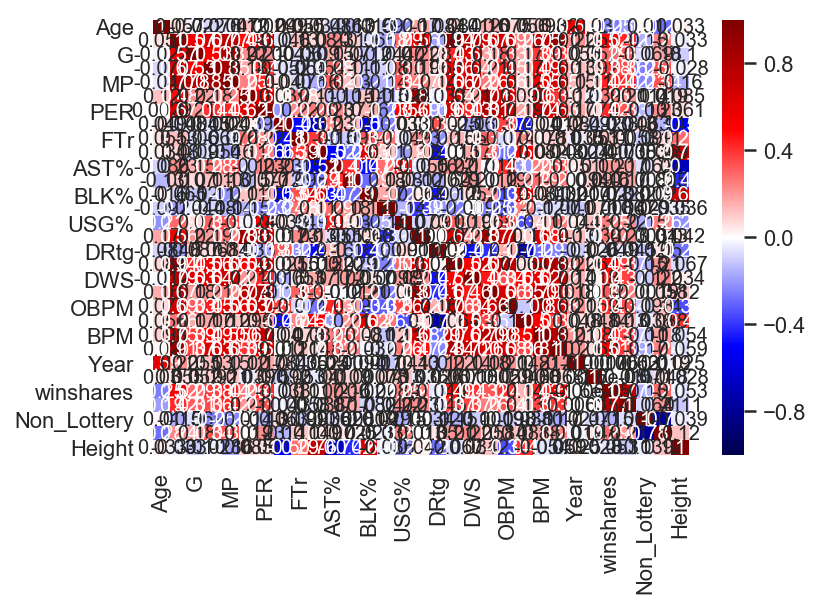

In [11]:
sns.heatmap(nba_df.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);

In [12]:
nba_df = nba_df.drop(['Non_Lottery', 'index', 'PER', 'VORP', '3PAr', 'FTr'], axis=1)
nba_df.columns

Index(['Player', 'Age', 'WS', 'G', 'GS', 'MP', 'TS%', 'TRB%', 'AST%', 'STL%',
       'BLK%', 'TOV%', 'USG%', 'ORtg', 'DRtg', 'OWS', 'DWS', 'WS/48', 'OBPM',
       'DBPM', 'BPM', 'Year', 'winshares', 'log_winshares', 'Lottery',
       'Height'],
      dtype='object')

I remove these columns out of concern regarding multicollinearity.

In [13]:
nba_df = nba_df.drop(['OWS', 'DWS', 'G', 'GS'], axis=1)
nba_df.columns

Index(['Player', 'Age', 'WS', 'MP', 'TS%', 'TRB%', 'AST%', 'STL%', 'BLK%',
       'TOV%', 'USG%', 'ORtg', 'DRtg', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'Year',
       'winshares', 'log_winshares', 'Lottery', 'Height'],
      dtype='object')

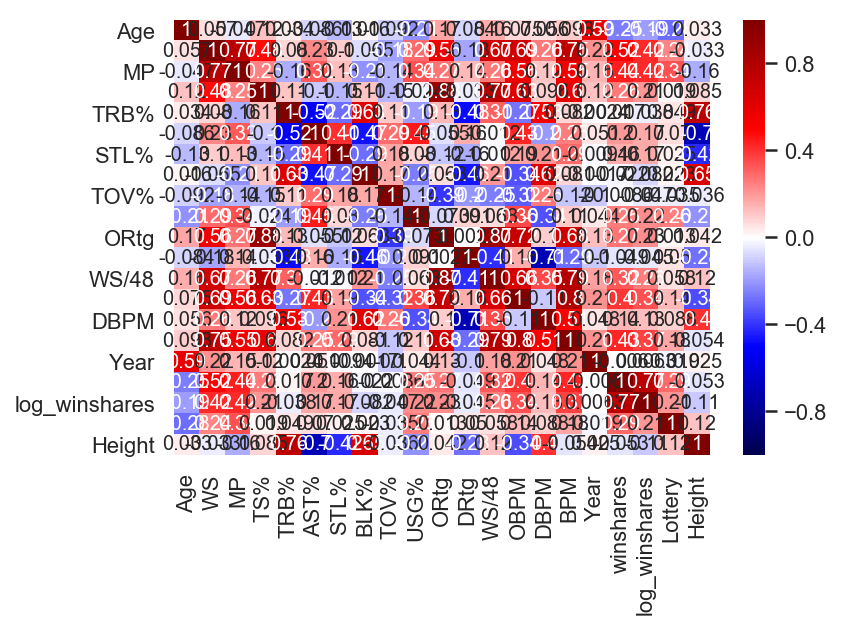

In [14]:
sns.heatmap(nba_df.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);

In [15]:
nba_df = nba_df.drop(['WS/48'], axis=1)
nba_df.columns

Index(['Player', 'Age', 'WS', 'MP', 'TS%', 'TRB%', 'AST%', 'STL%', 'BLK%',
       'TOV%', 'USG%', 'ORtg', 'DRtg', 'OBPM', 'DBPM', 'BPM', 'Year',
       'winshares', 'log_winshares', 'Lottery', 'Height'],
      dtype='object')

In [16]:
nba_df = nba_df.drop(['OBPM'], axis=1)
nba_df.columns

Index(['Player', 'Age', 'WS', 'MP', 'TS%', 'TRB%', 'AST%', 'STL%', 'BLK%',
       'TOV%', 'USG%', 'ORtg', 'DRtg', 'DBPM', 'BPM', 'Year', 'winshares',
       'log_winshares', 'Lottery', 'Height'],
      dtype='object')

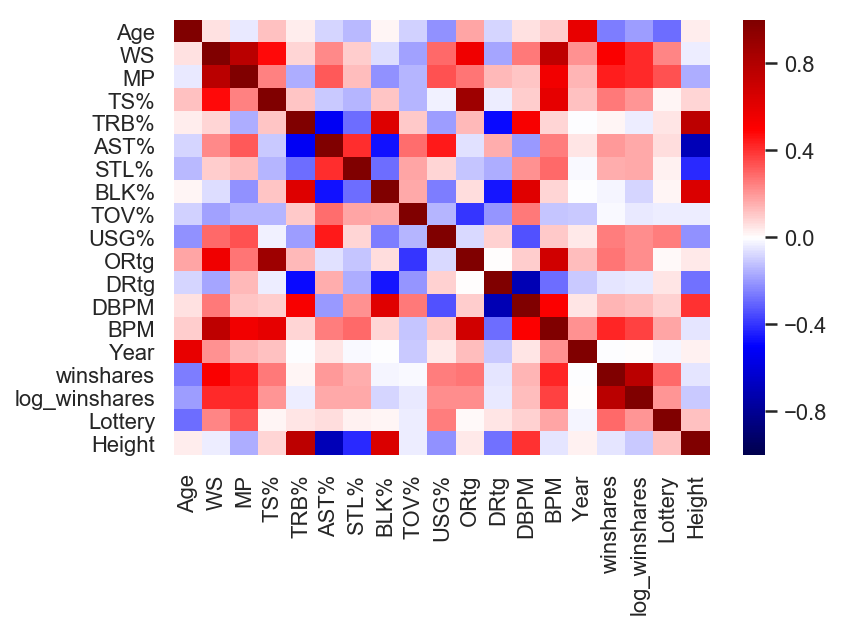

In [17]:
sns.heatmap(nba_df.corr(), cmap="seismic", annot=False, vmin=-1, vmax=1);

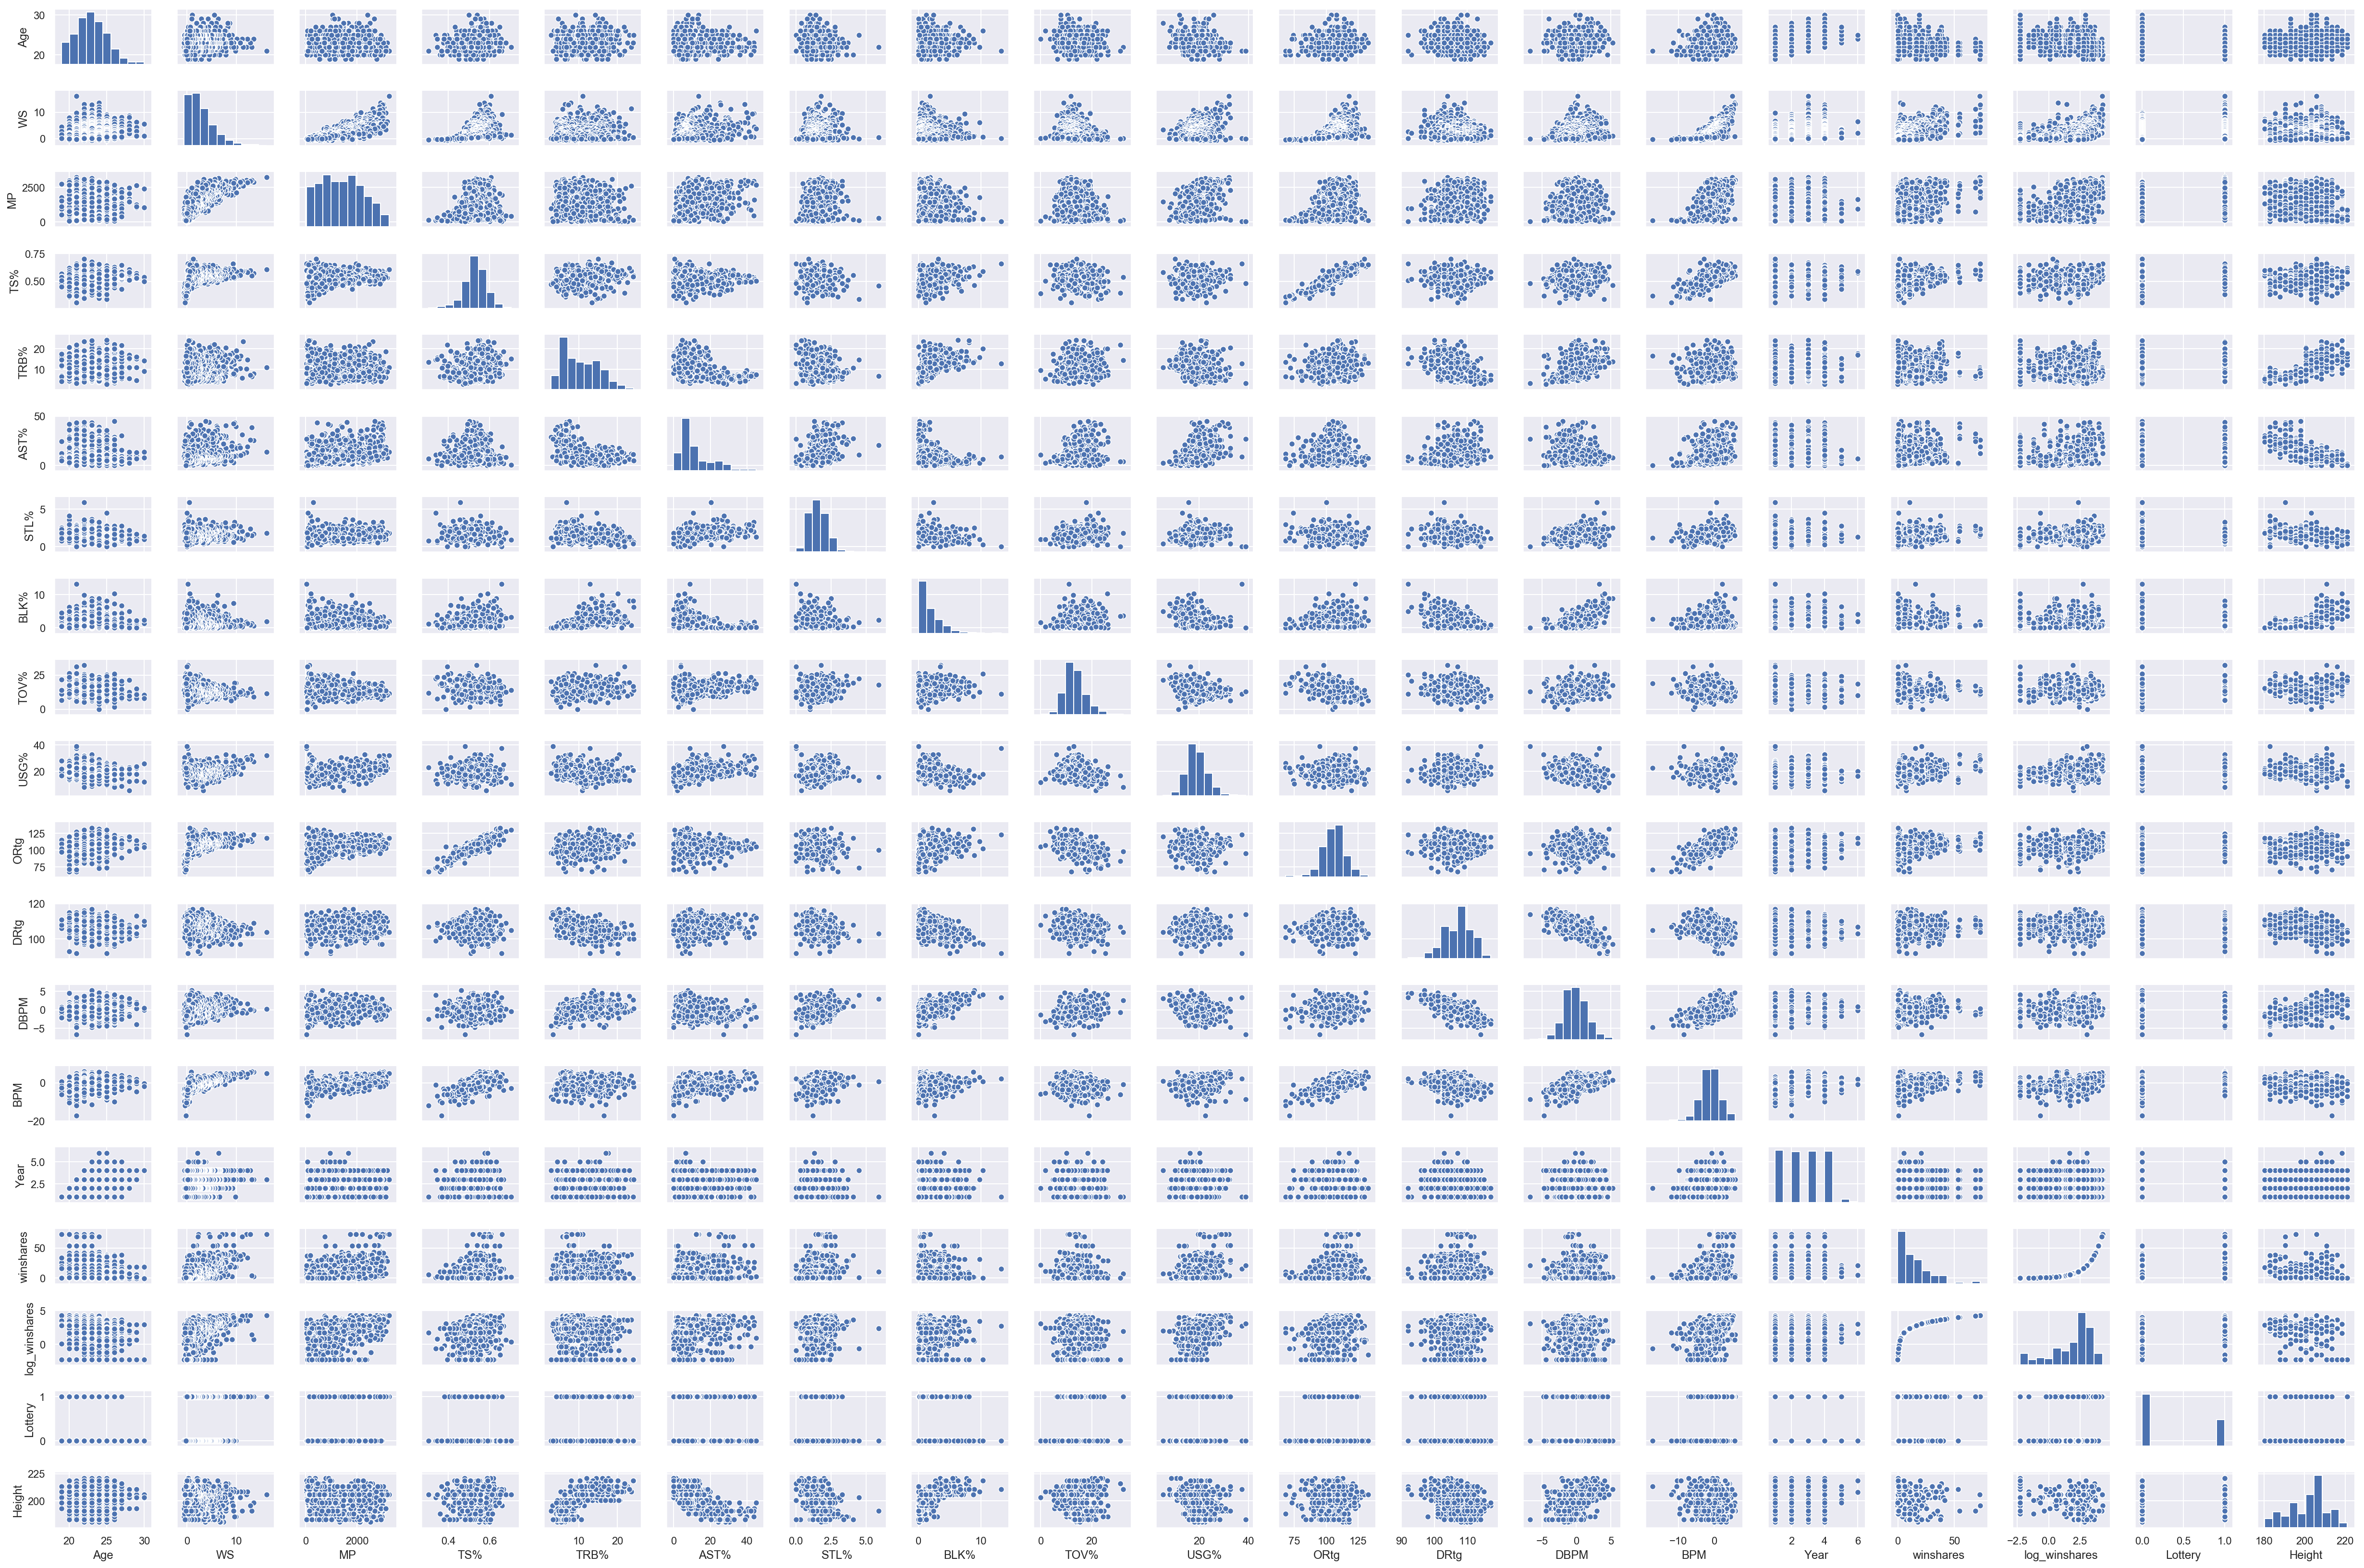

In [18]:
sns.pairplot(nba_df, height=1.2, aspect=1.5);

In [19]:
nba_df = nba_df.drop(['ORtg'], axis=1)
nba_df.columns

Index(['Player', 'Age', 'WS', 'MP', 'TS%', 'TRB%', 'AST%', 'STL%', 'BLK%',
       'TOV%', 'USG%', 'DRtg', 'DBPM', 'BPM', 'Year', 'winshares',
       'log_winshares', 'Lottery', 'Height'],
      dtype='object')

The age at which a rookie enters the NBA may be useful.

In [20]:
def rookage(row):
    return nba_df[nba_df['Player'] == row['Player']]['Age'].min()
nba_df['Rookie_Age'] = nba_df.apply(lambda x: rookage(x), axis = 1)
nba_df.head()

Player   Age    WS      MP    TS%  TRB%  AST%  STL%  BLK%  TOV%  \
0  Kevin Durant  21.0  16.1  3239.0  0.607  11.0  13.5   1.8   1.9  11.7   
1  Kevin Durant  22.0  12.0  3038.0  0.589  10.3  13.2   1.5   1.8  10.6   
2  Kevin Durant  20.0   7.9  2885.0  0.577   9.6  13.5   1.7   1.4  12.2   
3  Kevin Durant  19.0   2.3  2768.0  0.519   6.9  12.0   1.4   1.9  12.9   
4   Brandon Roy  24.0  13.5  2903.0  0.573   7.9  25.4   1.7   0.6   9.0   

   USG%   DRtg  DBPM  BPM  Year  winshares  log_winshares  Lottery  Height  \
0  32.0  104.0   0.2  5.1   3.0       72.6       4.284965      1.0  205.74   
1  30.6  107.0  -0.8  2.9   4.0       72.6       4.284965      1.0  205.74   
2  28.3  109.0  -0.5  1.8   2.0       72.6       4.284965      1.0  205.74   
3  28.1  110.0  -0.7 -1.4   1.0       72.6       4.284965      1.0  205.74   
4  27.4  109.0  -0.2  5.8   3.0        2.1       0.741937      1.0  198.12   

   Rookie_Age  
0        19.0  
1        19.0  
2        19.0  
3        19.0  
4        22.0

In [21]:
nba_df.to_csv("nba_pruned.csv", sep = ",")

Here, I would like to transform some of my stats to "growth" stats, essentially by differencing. How I difference depends on the convention for interpreting each metric. USG% and TS% put the decimal in different places.

In [22]:
test_player = "James Harden"
metric = 'TS%'
fourth = nba_df[(nba_df['Player'] == test_player) & (nba_df['Year'] == 4.0)][metric].values

third = nba_df[(nba_df['Player'] == test_player) & (nba_df['Year'] == 3.0)][metric].values
second = nba_df[(nba_df['Player'] == test_player) & (nba_df['Year'] == 2.0)][metric].values

test_output = (((fourth + third) / 2) - second)[0]

In [23]:
test_output

0.03200000000000003

In [24]:
anomalies = []
def simple_growth(row, metric):
    fourth = nba_df[(nba_df['Player'] == row['Player']) & (nba_df['Year'] == 4.0)][metric].values
    third = nba_df[(nba_df['Player'] == row['Player']) & (nba_df['Year'] == 3.0)][metric].values
    second = nba_df[(nba_df['Player'] == row['Player']) & (nba_df['Year'] == 2.0)][metric].values
    
    try:
        output = (((fourth + third) / 2) - second)[0]
    except:
        anomalies.append((row['Player']))
        output = 0
        
    return output
    
#     return (((fourth + third) / 2) - second)[0]
percentage_metrics = ['TS%', 'TRB%', 'AST%', 'STL%', 'BLK%','TOV%', 'USG%']

for metric in percentage_metrics:
#     nba_df[metric + '_g'] = nba_df.apply(lambda x: simple_growth(x, metric), axis = 1)
    nba_df[metric + '_g'] = nba_df.apply(lambda x: simple_growth(x, metric), axis=1)




In [25]:
len(anomalies)

308

In [26]:
print(anomalies)

['Ersan İlyasova', 'Ersan İlyasova', 'Ersan İlyasova', 'Ersan İlyasova', 'Jonas Jerebko', 'Jonas Jerebko', 'Jonas Jerebko', 'Jonas Jerebko', 'Darrell Arthur', 'Darrell Arthur', 'Darrell Arthur', 'Darrell Arthur', 'Brandan Wright', 'Brandan Wright', 'Brandan Wright', 'Brandan Wright', 'Ian Mahinmi', 'Ian Mahinmi', 'Ian Mahinmi', 'Ian Mahinmi', 'Shawne Williams', 'Shawne Williams', 'Shawne Williams', 'Shawne Williams', 'Jeff Ayres', 'Jeff Ayres', 'Jeff Ayres', 'Jeff Ayres', 'Jason Smith', 'Jason Smith', 'Jason Smith', 'Jason Smith', 'Alexis Ajinça', 'Alexis Ajinça', 'Alexis Ajinça', 'Alexis Ajinça', 'Chris Douglas-Roberts', 'Chris Douglas-Roberts', 'Chris Douglas-Roberts', 'Chris Douglas-Roberts', 'Garrett Temple', 'Garrett Temple', 'Garrett Temple', 'Garrett Temple', 'Ersan İlyasova', 'Ersan İlyasova', 'Ersan İlyasova', 'Ersan İlyasova', 'Jonas Jerebko', 'Jonas Jerebko', 'Jonas Jerebko', 'Jonas Jerebko', 'Darrell Arthur', 'Darrell Arthur', 'Darrell Arthur', 'Darrell Arthur', 'Brandan Wr

In [27]:
nba_df[nba_df['Player'] == 'Ersan İlyasova']

Player   Age   WS      MP    TS%  TRB%  AST%  STL%  BLK%  TOV%  \
144  Ersan İlyasova  24.0  6.4  1655.0  0.577  17.6   7.0   1.3   2.0  10.1   
145  Ersan İlyasova  22.0  5.8  1898.0  0.526  15.5   7.5   1.5   1.0   8.2   
146  Ersan İlyasova  23.0  3.8  1505.0  0.516  14.1   6.6   1.8   1.3  10.2   
147  Ersan İlyasova  19.0  1.0   973.0  0.500  11.4   7.8   1.4   1.4  11.3   

      ...    Lottery  Height  Rookie_Age  TS%_g  TRB%_g  AST%_g  STL%_g  \
144   ...        0.0   208.0        19.0    0.0     0.0     0.0     0.0   
145   ...        0.0   208.0        19.0    0.0     0.0     0.0     0.0   
146   ...        0.0   208.0        19.0    0.0     0.0     0.0     0.0   
147   ...        0.0   208.0        19.0    0.0     0.0     0.0     0.0   

     BLK%_g  TOV%_g  USG%_g  
144     0.0     0.0     0.0  
145     0.0     0.0     0.0  
146     0.0     0.0     0.0  
147     0.0     0.0     0.0  

[4 rows x 27 columns]

In [28]:
nba_df['TS%_g'].describe()

count    696.000000
mean       0.005580
std        0.046755
min       -0.121000
25%       -0.021500
50%        0.003250
75%        0.026500
max        0.147000
Name: TS%_g, dtype: float64

In [29]:
nba_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 27 columns):
Player           696 non-null object
Age              696 non-null float64
WS               696 non-null float64
MP               696 non-null float64
TS%              696 non-null float64
TRB%             696 non-null float64
AST%             696 non-null float64
STL%             696 non-null float64
BLK%             696 non-null float64
TOV%             696 non-null float64
USG%             696 non-null float64
DRtg             696 non-null float64
DBPM             696 non-null float64
BPM              696 non-null float64
Year             696 non-null float64
winshares        696 non-null float64
log_winshares    696 non-null float64
Lottery          696 non-null float64
Height           696 non-null float64
Rookie_Age       696 non-null float64
TS%_g            696 non-null float64
TRB%_g           696 non-null float64
AST%_g           696 non-null float64
STL%_g           696 n

In [30]:
!ls

2013_movies.csv
39143383939933156_1161966312787261238
Ames_Housing_Data.tsv
Challenge_2.ipynb
FR Eth by Yr.pdf
LR-assumptions
Lasso Pairs.ipynb
Linear_Regression_Theory_Intro.ipynb
Time Series with Python.ipynb
Untitled.ipynb
all_seasons.csv
all_seasons.csv.zip
ames.csv
bbref_webscrape_beautifulsoup.ipynb
data
feature_engineering_model_selection.ipynb
feature_engineering_regression.ipynb
gradient_descent.ipynb
hypothesis_testing_student.ipynb
investigations
linear-assumptions-testing.ipynb
nba_clean_transform.ipynb
nba_final_cleaned.csv
nba_finish_cleaning.ipynb
nba_master.csv
nba_master_heights.csv
nba_master_new.csv
nba_pruned.csv
nba_webscrape_clean.ipynb
nine_yr_avg.png
oop
pair_programming_day_13.ipynb
peak_ws.csv
peak_ws_v2.csv
playing with rapm.ipynb
rapm.csv
resid_plot.png
rook_avg.png
rook_traj.png
simple_introduction_to_unit_tests.ipynb
small_df_heights.csv
unit_test_exercise_mta.ipynb
vet_avg.png
vet_traj.png
web_scraping_beautifulsoup.ipynb
yr1_hist.png
yr2_hist.png
yr3_his

In [31]:
peak_ws_df=pd.read_csv("peak_ws_v2.csv")
peak_ws_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 3 columns):
Unnamed: 0    174 non-null int64
Player        174 non-null object
Peak_WS       174 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 4.2+ KB


In [32]:
nbap_df = pd.merge(nba_df, peak_ws_df, how = "outer", left_on = "Player", right_on = "Player")
nbap_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 696 entries, 0 to 695
Data columns (total 29 columns):
Player           696 non-null object
Age              696 non-null float64
WS               696 non-null float64
MP               696 non-null float64
TS%              696 non-null float64
TRB%             696 non-null float64
AST%             696 non-null float64
STL%             696 non-null float64
BLK%             696 non-null float64
TOV%             696 non-null float64
USG%             696 non-null float64
DRtg             696 non-null float64
DBPM             696 non-null float64
BPM              696 non-null float64
Year             696 non-null float64
winshares        696 non-null float64
log_winshares    696 non-null float64
Lottery          696 non-null float64
Height           696 non-null float64
Rookie_Age       696 non-null float64
TS%_g            696 non-null float64
TRB%_g           696 non-null float64
AST%_g           696 non-null float64
STL%_g           696 n

In [33]:
def mp_growth(row):
    fourth = nbap_df[(nbap_df['Player'] == row['Player']) & (nbap_df['Year'] == 4.0)]['MP'].max()
    third = nbap_df[(nbap_df['Player'] == row['Player']) & (nbap_df['Year'] == 3.0)]['MP'].max()
    second = nbap_df[(nbap_df['Player'] == row['Player']) & (nbap_df['Year'] == 2.0)]['MP'].max()
    output = (((fourth + third)/2) - second)/second
        
    return output

nbap_df['MP%_g'] = nbap_df.apply(lambda x: mp_growth(x), axis=1)



In [34]:
nbap_df.head(5)

Player   Age    WS      MP    TS%  TRB%  AST%  STL%  BLK%  TOV%  \
0  Kevin Durant  21.0  16.1  3239.0  0.607  11.0  13.5   1.8   1.9  11.7   
1  Kevin Durant  22.0  12.0  3038.0  0.589  10.3  13.2   1.5   1.8  10.6   
2  Kevin Durant  20.0   7.9  2885.0  0.577   9.6  13.5   1.7   1.4  12.2   
3  Kevin Durant  19.0   2.3  2768.0  0.519   6.9  12.0   1.4   1.9  12.9   
4   Brandon Roy  24.0  13.5  2903.0  0.573   7.9  25.4   1.7   0.6   9.0   

     ...      TS%_g  TRB%_g  AST%_g  STL%_g  BLK%_g  TOV%_g  USG%_g  \
0    ...     0.0210    1.05   -0.15   -0.05    0.45   -1.05    3.00   
1    ...     0.0210    1.05   -0.15   -0.05    0.45   -1.05    3.00   
2    ...     0.0210    1.05   -0.15   -0.05    0.45   -1.05    3.00   
3    ...     0.0210    1.05   -0.15   -0.05    0.45   -1.05    3.00   
4    ...     0.0395    0.30   -3.95    0.05    0.15   -0.05    2.15   

   Unnamed: 0  Peak_WS     MP%_g  
0         113     19.2  0.087868  
1         113     19.2  0.087868  
2         113     19.2  0.087868  
3         113     19.2  0.087868  
4          42      2.1 -0.046920  

[5 rows x 30 columns]

In [35]:
nbap_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 696 entries, 0 to 695
Data columns (total 30 columns):
Player           696 non-null object
Age              696 non-null float64
WS               696 non-null float64
MP               696 non-null float64
TS%              696 non-null float64
TRB%             696 non-null float64
AST%             696 non-null float64
STL%             696 non-null float64
BLK%             696 non-null float64
TOV%             696 non-null float64
USG%             696 non-null float64
DRtg             696 non-null float64
DBPM             696 non-null float64
BPM              696 non-null float64
Year             696 non-null float64
winshares        696 non-null float64
log_winshares    696 non-null float64
Lottery          696 non-null float64
Height           696 non-null float64
Rookie_Age       696 non-null float64
TS%_g            696 non-null float64
TRB%_g           696 non-null float64
AST%_g           696 non-null float64
STL%_g           696 n

In [36]:
nbap_df.head()

Player   Age    WS      MP    TS%  TRB%  AST%  STL%  BLK%  TOV%  \
0  Kevin Durant  21.0  16.1  3239.0  0.607  11.0  13.5   1.8   1.9  11.7   
1  Kevin Durant  22.0  12.0  3038.0  0.589  10.3  13.2   1.5   1.8  10.6   
2  Kevin Durant  20.0   7.9  2885.0  0.577   9.6  13.5   1.7   1.4  12.2   
3  Kevin Durant  19.0   2.3  2768.0  0.519   6.9  12.0   1.4   1.9  12.9   
4   Brandon Roy  24.0  13.5  2903.0  0.573   7.9  25.4   1.7   0.6   9.0   

     ...      TS%_g  TRB%_g  AST%_g  STL%_g  BLK%_g  TOV%_g  USG%_g  \
0    ...     0.0210    1.05   -0.15   -0.05    0.45   -1.05    3.00   
1    ...     0.0210    1.05   -0.15   -0.05    0.45   -1.05    3.00   
2    ...     0.0210    1.05   -0.15   -0.05    0.45   -1.05    3.00   
3    ...     0.0210    1.05   -0.15   -0.05    0.45   -1.05    3.00   
4    ...     0.0395    0.30   -3.95    0.05    0.15   -0.05    2.15   

   Unnamed: 0  Peak_WS     MP%_g  
0         113     19.2  0.087868  
1         113     19.2  0.087868  
2         113     19.2  0.087868  
3         113     19.2  0.087868  
4          42      2.1 -0.046920  

[5 rows x 30 columns]

In [37]:
def ws_growth(row):
    fourth = nbap_df[(nbap_df['Player'] == row['Player']) & (nbap_df['Year'] == 4.0)]['WS'].max()
    third = nbap_df[(nbap_df['Player'] == row['Player']) & (nbap_df['Year'] == 3.0)]['WS'].max()
    peak = nbap_df[(nbap_df['Player'] == row['Player']) & (nbap_df['Year'] == 2.0)]['Peak_WS'].max()
    baseline = ((fourth + third)/2) 
    return (peak - baseline)/baseline    
    return output

nbap_df['WS_growth'] = nbap_df.apply(lambda x: ws_growth(x), axis=1)

In [38]:
nbap_df.head(5)

Player   Age    WS      MP    TS%  TRB%  AST%  STL%  BLK%  TOV%  \
0  Kevin Durant  21.0  16.1  3239.0  0.607  11.0  13.5   1.8   1.9  11.7   
1  Kevin Durant  22.0  12.0  3038.0  0.589  10.3  13.2   1.5   1.8  10.6   
2  Kevin Durant  20.0   7.9  2885.0  0.577   9.6  13.5   1.7   1.4  12.2   
3  Kevin Durant  19.0   2.3  2768.0  0.519   6.9  12.0   1.4   1.9  12.9   
4   Brandon Roy  24.0  13.5  2903.0  0.573   7.9  25.4   1.7   0.6   9.0   

     ...      TRB%_g  AST%_g  STL%_g  BLK%_g  TOV%_g  USG%_g  Unnamed: 0  \
0    ...        1.05   -0.15   -0.05    0.45   -1.05    3.00         113   
1    ...        1.05   -0.15   -0.05    0.45   -1.05    3.00         113   
2    ...        1.05   -0.15   -0.05    0.45   -1.05    3.00         113   
3    ...        1.05   -0.15   -0.05    0.45   -1.05    3.00         113   
4    ...        0.30   -3.95    0.05    0.15   -0.05    2.15          42   

   Peak_WS     MP%_g  WS_growth  
0     19.2  0.087868   0.366548  
1     19.2  0.087868   0.366548  
2     19.2  0.087868   0.366548  
3     19.2  0.087868   0.366548  
4      2.1 -0.046920  -0.814159  

[5 rows x 31 columns]

In [39]:
nbap_df.corr()

Age        WS        MP       TS%      TRB%      AST%  \
Age            1.000000  0.056689 -0.046652  0.120373  0.033871 -0.085721   
WS             0.056689  1.000000  0.773279  0.477148  0.080483  0.230610   
MP            -0.046652  0.773279  1.000000  0.246829 -0.157770  0.320854   
TS%            0.120373  0.477148  0.246829  1.000000  0.110979 -0.104794   
TRB%           0.033871  0.080483 -0.157770  0.110979  1.000000 -0.524041   
AST%          -0.085721  0.230610  0.320854 -0.104794 -0.524041  1.000000   
STL%          -0.133997  0.101346  0.129096 -0.146543 -0.285976  0.413658   
BLK%           0.015927 -0.064789 -0.214635  0.114976  0.627425 -0.466653   
TOV%          -0.091543 -0.184085 -0.143157 -0.146027  0.108192  0.289001   
USG%          -0.213037  0.293816  0.337876 -0.024474 -0.188253  0.451131   
DRtg          -0.084235 -0.179373  0.137000 -0.033348 -0.484122  0.158009   
DBPM           0.056091  0.264345  0.116829  0.095924  0.525512 -0.197180   
BPM            0.097887  0.754974  0.552930  0.600129  0.082435  0.250891   
Year           0.590551  0.215146  0.146576  0.117849 -0.002407  0.050526   
winshares     -0.253313  0.516905  0.437945  0.259015  0.016789  0.200135   
log_winshares -0.192722  0.419658  0.418013  0.208125 -0.037697  0.166948   
Lottery       -0.281479  0.242075  0.343120  0.018727  0.048879  0.069837   
Height         0.032813 -0.032997 -0.159588  0.085065  0.761283 -0.695911   
Rookie_Age     0.796552 -0.090943 -0.167609  0.060851  0.043768 -0.144057   
TS%_g         -0.081193 -0.047622 -0.060171 -0.104679  0.091339  0.053770   
TRB%_g        -0.018366 -0.106283 -0.143961 -0.012570  0.136803 -0.091377   
AST%_g        -0.078298  0.140055  0.092762  0.061958 -0.023582  0.168480   
STL%_g        -0.039367  0.021016  0.025923  0.013339 -0.050835  0.008133   
BLK%_g        -0.023270 -0.006819  0.001130  0.015888 -0.035843 -0.022781   
TOV%_g         0.035807 -0.053342 -0.099321 -0.006126 -0.048763  0.067579   
USG%_g        -0.076272  0.217303  0.225319  0.094905  0.031122  0.105244   
Unnamed: 0     0.012714  0.140637  0.109563  0.022632 -0.015405  0.081843   
Peak_WS       -0.255695  0.533627  0.445977  0.274785  0.030427  0.204173   
MP%_g          0.062926 -0.164978 -0.232304 -0.136638  0.083739 -0.125904   
WS_growth     -0.101453 -0.160965 -0.103855 -0.178350 -0.042149  0.023369   

                   STL%      BLK%      TOV%      USG%      ...         TRB%_g  \
Age           -0.133997  0.015927 -0.091543 -0.213037      ...      -0.018366   
WS             0.101346 -0.064789 -0.184085  0.293816      ...      -0.106283   
MP             0.129096 -0.214635 -0.143157  0.337876      ...      -0.143961   
TS%           -0.146543  0.114976 -0.146027 -0.024474      ...      -0.012570   
TRB%          -0.285976  0.627425  0.108192 -0.188253      ...       0.136803   
AST%           0.413658 -0.466653  0.289001  0.451131      ...      -0.091377   
STL%           1.000000 -0.287737  0.179288  0.080229      ...      -0.043415   
BLK%          -0.287737  1.000000  0.166220 -0.254823      ...       0.213926   
TOV%           0.179288  0.166220  1.000000 -0.143047      ...       0.188899   
USG%           0.080229 -0.254823 -0.143047  1.000000      ...      -0.167611   
DRtg          -0.159615 -0.455467 -0.204213  0.091403      ...      -0.146683   
DBPM           0.214262  0.620770  0.263046 -0.341712      ...       0.165587   
BPM            0.291324  0.080837 -0.115799  0.108375      ...       0.004316   
Year          -0.009383 -0.001662 -0.104962  0.044317      ...       0.001416   
winshares      0.163223 -0.021571 -0.008619  0.251831      ...      -0.095215   
log_winshares  0.168254 -0.081908 -0.046500  0.220713      ...      -0.067451   
Lottery        0.024885  0.022645 -0.035176  0.257234      ...       0.000642   
Height        -0.416629  0.645681 -0.035582 -0.213459      ...       0.119094   
Rookie_Age    -0.158988  0.020979 -0.034786 -0.297146      ...      -0.023816   
TS%_g       

In [40]:
def dr_growth(row):
    fourth = nbap_df[(nbap_df['Player'] == row['Player']) & (nbap_df['Year'] == 4.0)]['DRtg'].max()
    third = nbap_df[(nbap_df['Player'] == row['Player']) & (nbap_df['Year'] == 3.0)]['DRtg'].max()
    second = nbap_df[(nbap_df['Player'] == row['Player']) & (nbap_df['Year'] == 2.0)]['DRtg'].max()
    output = (((fourth + third)/2) - second)/second
        
    return output

nbap_df['DRtg_g'] = nbap_df.apply(lambda x: dr_growth(x), axis=1)



In [41]:
nbap_df.head(1)

Player   Age    WS      MP    TS%  TRB%  AST%  STL%  BLK%  TOV%  \
0  Kevin Durant  21.0  16.1  3239.0  0.607  11.0  13.5   1.8   1.9  11.7   

    ...     AST%_g  STL%_g  BLK%_g  TOV%_g  USG%_g  Unnamed: 0  Peak_WS  \
0   ...      -0.15   -0.05    0.45   -1.05     3.0         113     19.2   

      MP%_g  WS_growth   DRtg_g  
0  0.087868   0.366548 -0.03211  

[1 rows x 32 columns]

At this stage, removing Kevin Durant seems like a reasonable decision because he is well past the 90th percentile, and may skew the results of my regressions.

In [42]:
nbap_df = nbap_df[nbap_df['Player'] != "Kevin Durant"]

In [43]:
nbap_df.columns

Index(['Player', 'Age', 'WS', 'MP', 'TS%', 'TRB%', 'AST%', 'STL%', 'BLK%',
       'TOV%', 'USG%', 'DRtg', 'DBPM', 'BPM', 'Year', 'winshares',
       'log_winshares', 'Lottery', 'Height', 'Rookie_Age', 'TS%_g', 'TRB%_g',
       'AST%_g', 'STL%_g', 'BLK%_g', 'TOV%_g', 'USG%_g', 'Unnamed: 0',
       'Peak_WS', 'MP%_g', 'WS_growth', 'DRtg_g'],
      dtype='object')

I further trim my columns to test my conjecture that the patterns of statistical growth in specific basketball areas may predict continued improvement down the road.

In [44]:
first_attempt_df = nbap_df.drop(nbap_df.columns[0:17], axis = 1)
first_attempt_df.columns

Index(['Lottery', 'Height', 'Rookie_Age', 'TS%_g', 'TRB%_g', 'AST%_g',
       'STL%_g', 'BLK%_g', 'TOV%_g', 'USG%_g', 'Unnamed: 0', 'Peak_WS',
       'MP%_g', 'WS_growth', 'DRtg_g'],
      dtype='object')

In [45]:
first_attempt_df = first_attempt_df.drop(first_attempt_df.columns[10], axis = 1)
first_attempt_df.columns

Index(['Lottery', 'Height', 'Rookie_Age', 'TS%_g', 'TRB%_g', 'AST%_g',
       'STL%_g', 'BLK%_g', 'TOV%_g', 'USG%_g', 'Peak_WS', 'MP%_g', 'WS_growth',
       'DRtg_g'],
      dtype='object')

In [46]:
first_attempt_df.corr()

Lottery    Height  Rookie_Age     TS%_g    TRB%_g    AST%_g  \
Lottery     1.000000  0.117084   -0.325895  0.083648 -0.005005  0.129034   
Height      0.117084  1.000000    0.027017  0.025574  0.117414 -0.128157   
Rookie_Age -0.325895  0.027017    1.000000 -0.095257 -0.017367 -0.094639   
TS%_g       0.083648  0.025574   -0.095257  1.000000  0.116454  0.093664   
TRB%_g     -0.005005  0.117414   -0.017367  0.116454  1.000000 -0.077785   
AST%_g      0.129034 -0.128157   -0.094639  0.093664 -0.077785  1.000000   
STL%_g      0.124240 -0.030084   -0.050985  0.036238 -0.011542  0.146245   
BLK%_g      0.006188 -0.030009   -0.024666  0.190062  0.100335 -0.004952   
TOV%_g      0.026108 -0.123103    0.039534 -0.134559  0.005632  0.150567   
USG%_g      0.162099  0.014864   -0.082022 -0.071690 -0.048249  0.262291   
Peak_WS     0.270344 -0.067421   -0.290908 -0.011604 -0.096992  0.182164   
MP%_g      -0.156801  0.072134    0.075262  0.256738 -0.088620  0.165156   
WS_growth  -0.029534 -0.073607   -0.127045 -0.116671 -0.005020 -0.095540   
DRtg_g     -0.030947  0.017867    0.118047 -0.040692 -0.196984 -0.021922   

              STL%_g    BLK%_g    TOV%_g    USG%_g   Peak_WS     MP%_g  \
Lottery     0.124240  0.006188  0.026108  0.162099  0.270344 -0.156801   
Height     -0.030084 -0.030009 -0.123103  0.014864 -0.067421  0.072134   
Rookie_Age -0.050985 -0.024666  0.039534 -0.082022 -0.290908  0.075262   
TS%_g       0.036238  0.190062 -0.134559 -0.071690 -0.011604  0.256738   
TRB%_g     -0.011542  0.100335  0.005632 -0.048249 -0.096992 -0.088620   
AST%_g      0.146245 -0.004952  0.150567  0.262291  0.182164  0.165156   
STL%_g      1.000000  0.320152  0.168088  0.149927  0.092449  0.144548   
BLK%_g      0.320152  1.000000  0.012649 -0.074976 -0.014562  0.114660   
TOV%_g      0.168088  0.012649  1.000000 -0.003650 -0.081926  0.040573   
USG%_g      0.149927 -0.074976 -0.003650  1.000000  0.247094 -0.122217   
Peak_WS     0.092449 -0.014562 -0.081926  0.247094  1.000000 -0.060866   
MP%_g       0.144548  0.114660  0.040573 -0.122217 -0.060866  1.000000   
WS_growth  -0.062521  0.020448  0.037570  0.054290  0.290071  0.074256   
DRtg_g     -0.339458 -0.371847 -0.092656 -0.056198 -0.148525  0.105108   

            WS_growth    DRtg_g  
Lottery     -0.029534 -0.030947  
Height      -0.073607  0.017867  
Rookie_Age  -0.127045  0.118047  
TS%_g       -0.116671 -0.040692  
TRB%_g      -0.005020 -0.196984  
AST%_g      -0.095540 -0.021922  
STL%_g      -0.062521 -0.339458  
BLK%_g       0.020448 -0.371847  
TOV%_g       0.037570 -0.092656  
USG%_g       0.054290 -0.056198  
Peak_WS      0.290071 -0.148525  
MP%_g        0.074256  0.105108  
WS_growth    1.000000  0.027709  
DRtg_g       0.027709  1.000000

/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


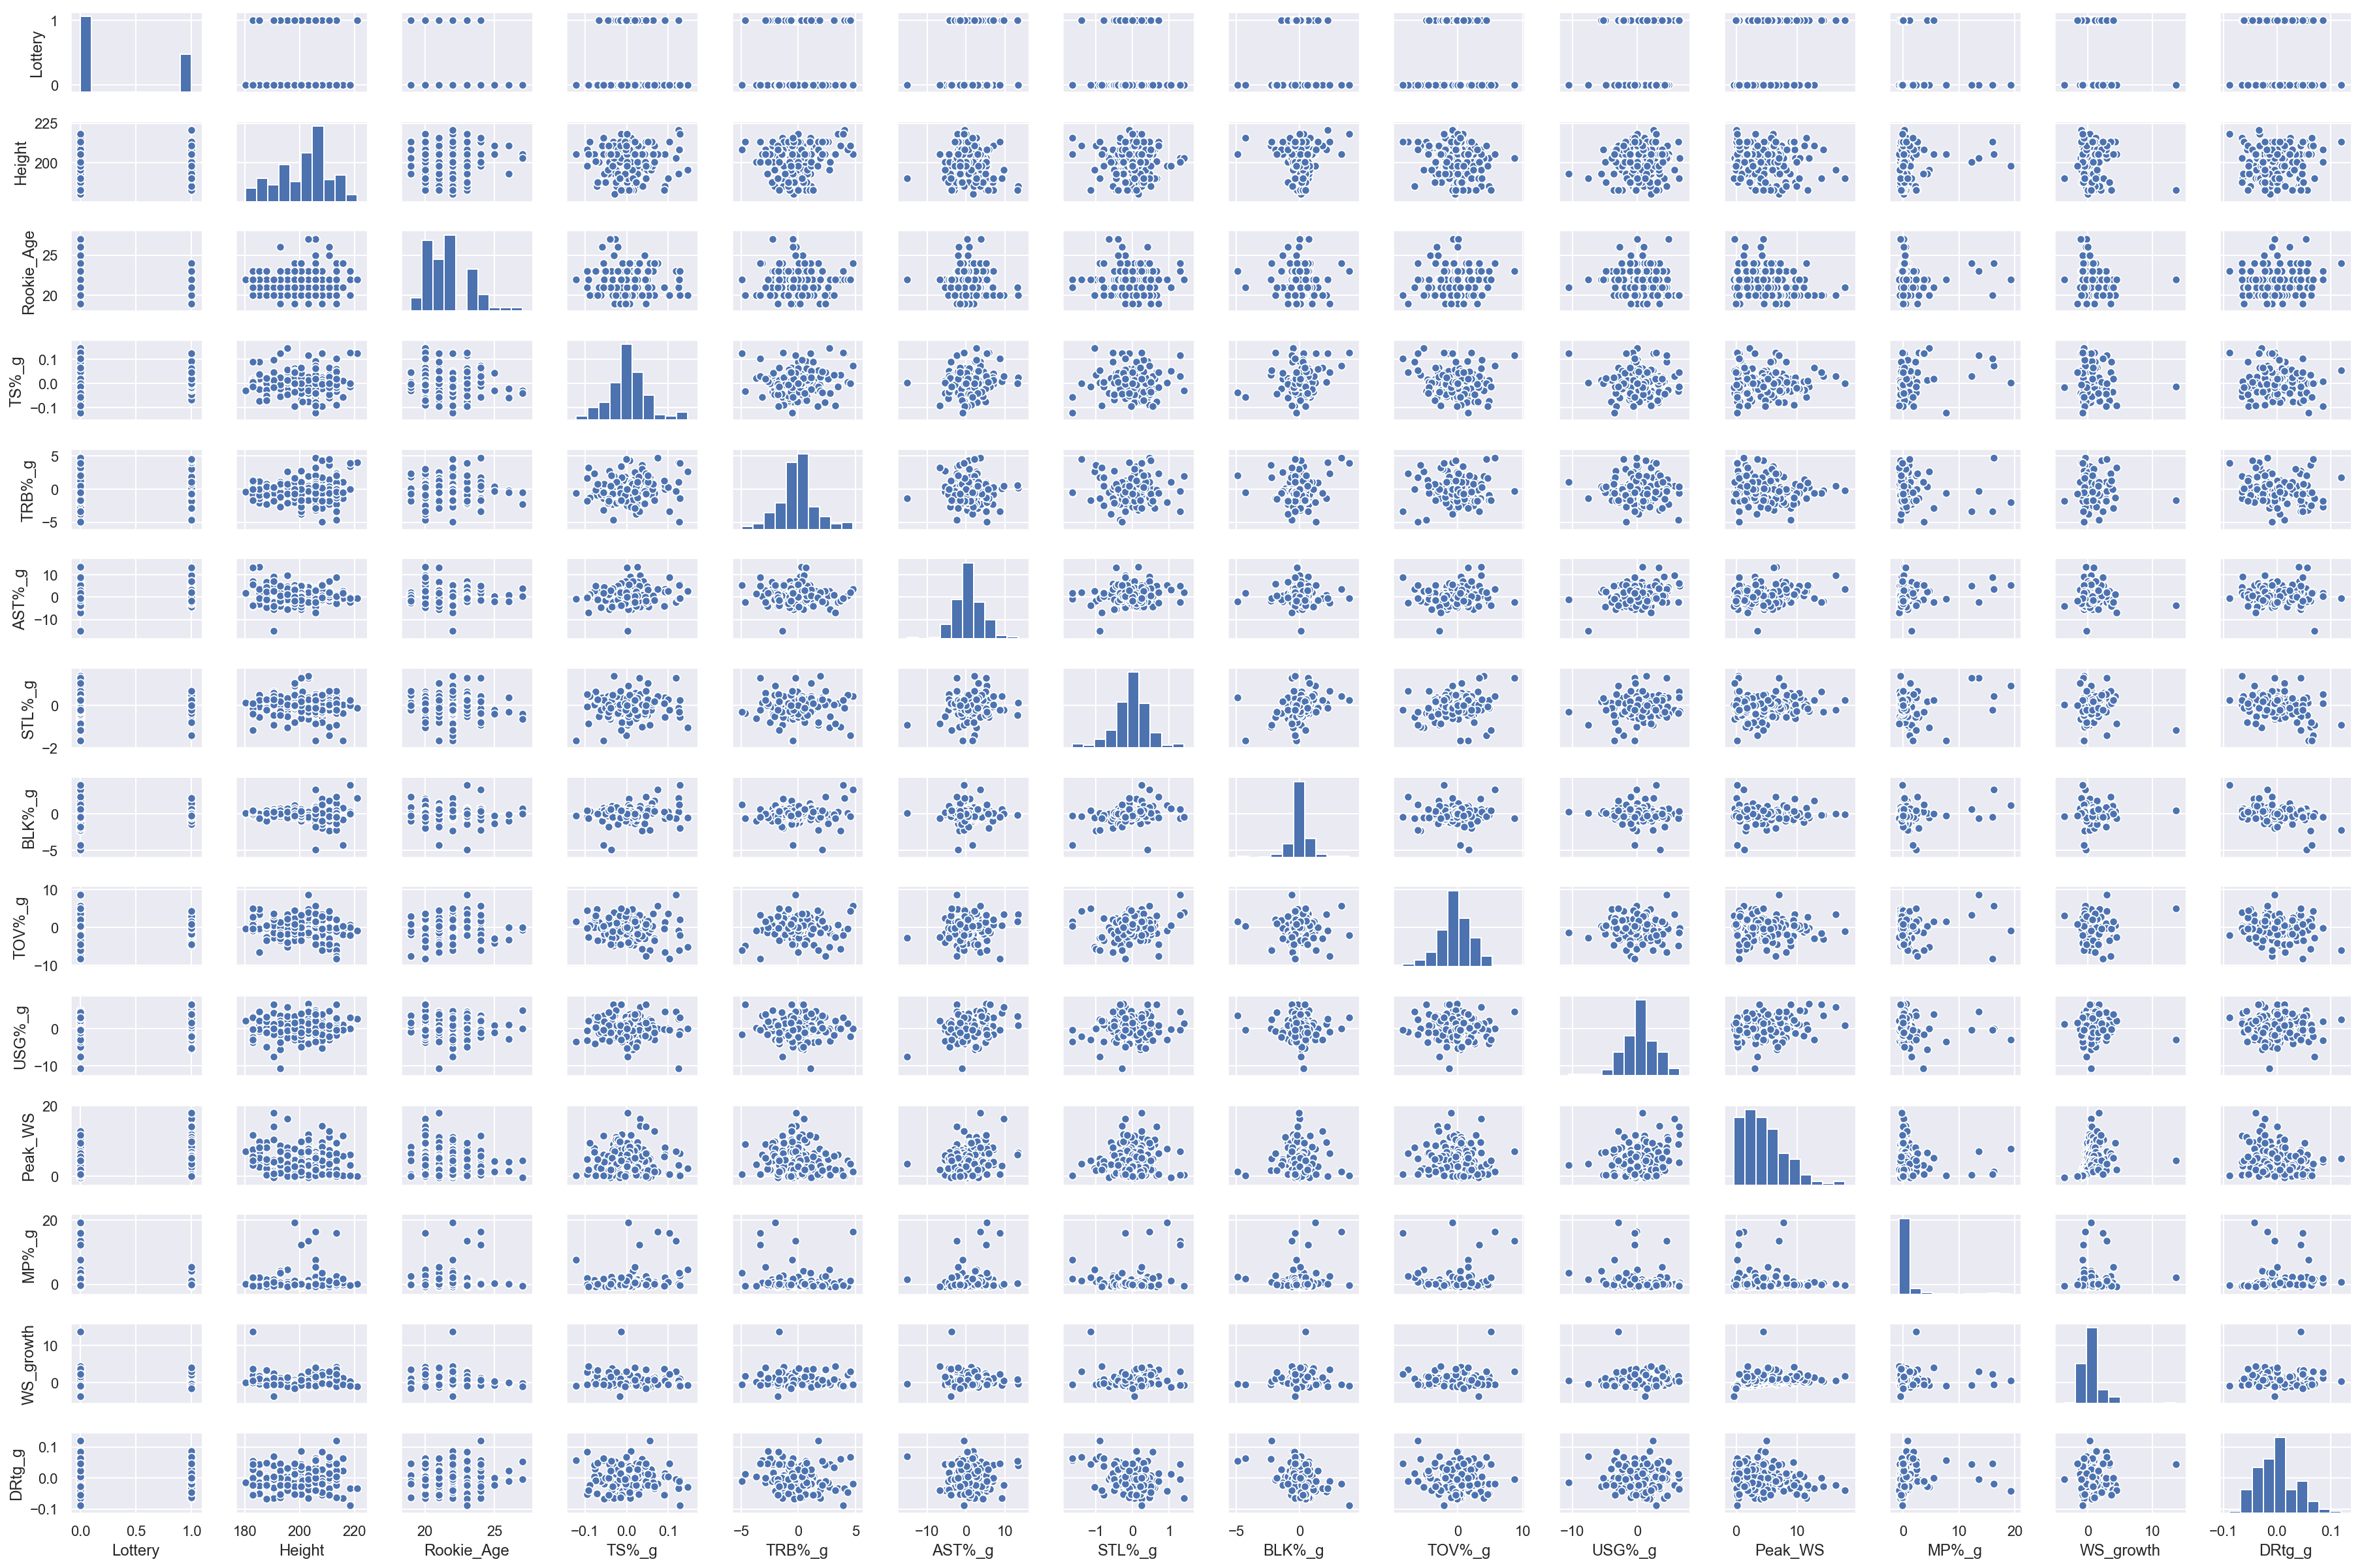

In [47]:
sns.pairplot(first_attempt_df, height=1.2, aspect=1.5);

In [48]:
first_attempt_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 692 entries, 4 to 695
Data columns (total 14 columns):
Lottery       692 non-null float64
Height        692 non-null float64
Rookie_Age    692 non-null float64
TS%_g         692 non-null float64
TRB%_g        692 non-null float64
AST%_g        692 non-null float64
STL%_g        692 non-null float64
BLK%_g        692 non-null float64
TOV%_g        692 non-null float64
USG%_g        692 non-null float64
Peak_WS       692 non-null float64
MP%_g         648 non-null float64
WS_growth     648 non-null float64
DRtg_g        648 non-null float64
dtypes: float64(14)
memory usage: 101.1 KB


Suddenly, there is an issue with nans. I will drop them as they are only 11 players out of 174.

In [49]:
first_attempt_df = first_attempt_df.drop_duplicates()
first_attempt_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173 entries, 4 to 692
Data columns (total 14 columns):
Lottery       173 non-null float64
Height        173 non-null float64
Rookie_Age    173 non-null float64
TS%_g         173 non-null float64
TRB%_g        173 non-null float64
AST%_g        173 non-null float64
STL%_g        173 non-null float64
BLK%_g        173 non-null float64
TOV%_g        173 non-null float64
USG%_g        173 non-null float64
Peak_WS       173 non-null float64
MP%_g         162 non-null float64
WS_growth     162 non-null float64
DRtg_g        162 non-null float64
dtypes: float64(14)
memory usage: 20.3 KB


In [50]:
first_attempt_df = first_attempt_df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
first_attempt_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162 entries, 4 to 692
Data columns (total 14 columns):
Lottery       162 non-null float64
Height        162 non-null float64
Rookie_Age    162 non-null float64
TS%_g         162 non-null float64
TRB%_g        162 non-null float64
AST%_g        162 non-null float64
STL%_g        162 non-null float64
BLK%_g        162 non-null float64
TOV%_g        162 non-null float64
USG%_g        162 non-null float64
Peak_WS       162 non-null float64
MP%_g         162 non-null float64
WS_growth     162 non-null float64
DRtg_g        162 non-null float64
dtypes: float64(14)
memory usage: 19.0 KB


In [51]:
X = first_attempt_df.loc[:,['Lottery', 'TS%_g', 'TRB%_g', 'AST%_g',
       'STL%_g', 'BLK%_g', 'TOV%_g', 'USG%_g', 'MP%_g', 'DRtg_g']]

y = first_attempt_df['WS_growth']

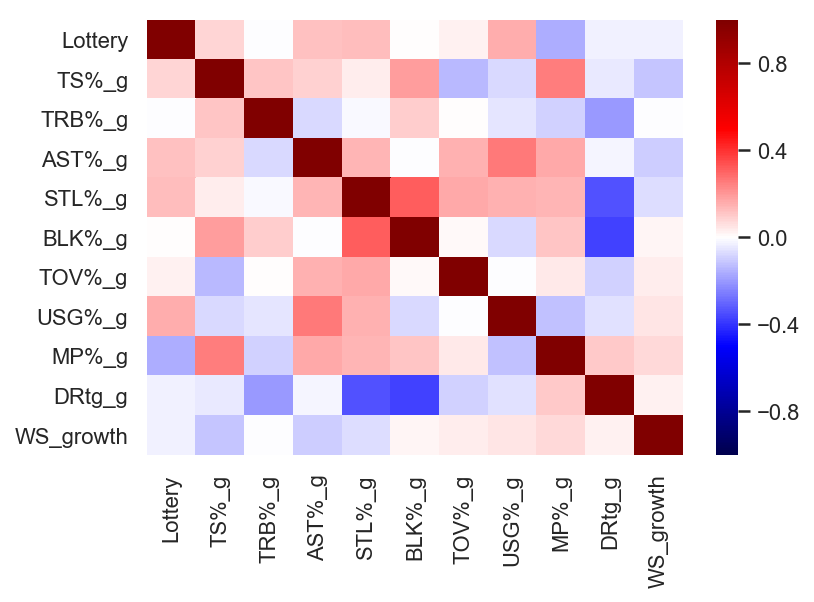

In [85]:
sns.heatmap(first_attempt_df.loc[:,['Lottery', 'TS%_g', 'TRB%_g', 'AST%_g',
       'STL%_g', 'BLK%_g', 'TOV%_g', 'USG%_g', 'MP%_g', 'DRtg_g', 'WS_growth']].corr(), cmap="seismic", annot=False, vmin=-1, vmax=1);
plt.savefig('faheatmap.png')

In [52]:
def split_and_validate(X, y):
    '''
    For a set of features and target X, y, perform a 80/20 train/val split, 
    fit and validate a linear regression model, and report results
    '''
    
    # perform train/val split
    X_train, X_val, y_train, y_val = \
        train_test_split(X, y, test_size=0.2, random_state=42)
    
    # fit linear regression to training data
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)
    
    # score fit model on validation data
    val_score = lr_model.score(X_val, y_val)
    
    val_score_2 = 1.0 - (1 - val_score) * (X_val.shape[0] - 1.) / (X_val.shape[0] - X_val.shape[1] - 1.)
    
    # report results
    print('\nValidation R^2 score was:', val_score)
    print('\nValidation Adj R^2 score was:', val_score_2)

    print('Feature coefficient results: \n')
    for feature, coef in zip(X.columns, lr_model.coef_):
        print(feature, ':', f'{coef:.2f}') 

In [53]:
split_and_validate(X, y)


Validation R^2 score was: -0.6308969460239495

Validation Adj R^2 score was: -1.3722137396711993
Feature coefficient results: 

Lottery : 0.06
TS%_g : -6.45
TRB%_g : -0.04
AST%_g : -0.08
STL%_g : -0.72
BLK%_g : 0.12
TOV%_g : 0.05
USG%_g : 0.03
MP%_g : 0.12
DRtg_g : 0.03


The R^2 doesn't look very promising in this regression, and judging from the correlations and pairplots, none of these features explain growth in winshares during a players second contract. Perhaps it would be better to include all my features in my nbap_df dataframe. I also choose to regress on Peak_WS rather than the growth of Win Shares, since none of the features seem to be correlated with growth in Win Shares.

In [54]:
kitchen_sink_df = nbap_df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
kitchen_sink_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 648 entries, 4 to 695
Data columns (total 32 columns):
Player           648 non-null object
Age              648 non-null float64
WS               648 non-null float64
MP               648 non-null float64
TS%              648 non-null float64
TRB%             648 non-null float64
AST%             648 non-null float64
STL%             648 non-null float64
BLK%             648 non-null float64
TOV%             648 non-null float64
USG%             648 non-null float64
DRtg             648 non-null float64
DBPM             648 non-null float64
BPM              648 non-null float64
Year             648 non-null float64
winshares        648 non-null float64
log_winshares    648 non-null float64
Lottery          648 non-null float64
Height           648 non-null float64
Rookie_Age       648 non-null float64
TS%_g            648 non-null float64
TRB%_g           648 non-null float64
AST%_g           648 non-null float64
STL%_g           648 n

In [55]:
kitchen_sink_df = kitchen_sink_df[kitchen_sink_df['Year'] == 4]
kitchen_sink_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162 entries, 5 to 693
Data columns (total 32 columns):
Player           162 non-null object
Age              162 non-null float64
WS               162 non-null float64
MP               162 non-null float64
TS%              162 non-null float64
TRB%             162 non-null float64
AST%             162 non-null float64
STL%             162 non-null float64
BLK%             162 non-null float64
TOV%             162 non-null float64
USG%             162 non-null float64
DRtg             162 non-null float64
DBPM             162 non-null float64
BPM              162 non-null float64
Year             162 non-null float64
winshares        162 non-null float64
log_winshares    162 non-null float64
Lottery          162 non-null float64
Height           162 non-null float64
Rookie_Age       162 non-null float64
TS%_g            162 non-null float64
TRB%_g           162 non-null float64
AST%_g           162 non-null float64
STL%_g           162 n

In [56]:
kitchen_sink_df.columns

Index(['Player', 'Age', 'WS', 'MP', 'TS%', 'TRB%', 'AST%', 'STL%', 'BLK%',
       'TOV%', 'USG%', 'DRtg', 'DBPM', 'BPM', 'Year', 'winshares',
       'log_winshares', 'Lottery', 'Height', 'Rookie_Age', 'TS%_g', 'TRB%_g',
       'AST%_g', 'STL%_g', 'BLK%_g', 'TOV%_g', 'USG%_g', 'Unnamed: 0',
       'Peak_WS', 'MP%_g', 'WS_growth', 'DRtg_g'],
      dtype='object')

In [57]:
X = kitchen_sink_df.loc[:,['Age', 'WS', 'MP', 'TS%', 'TRB%', 'AST%', 'STL%', 'BLK%',
       'TOV%', 'USG%', 'DRtg', 'DBPM', 'BPM', 'Year', 
       'log_winshares', 'Lottery', 'Height', 'Rookie_Age', 'TS%_g', 'TRB%_g',
       'AST%_g', 'STL%_g', 'BLK%_g', 'TOV%_g', 'USG%_g','MP%_g', 'DRtg_g' ]]

y = kitchen_sink_df['WS_growth']

split_and_validate(X, y)


Validation R^2 score was: -0.2259642044051775

Validation Adj R^2 score was: -6.846170908193136
Feature coefficient results: 

Age : -0.06
WS : -0.19
MP : -0.00
TS% : -4.56
TRB% : 0.04
AST% : 0.01
STL% : 0.26
BLK% : 0.02
TOV% : 0.01
USG% : -0.02
DRtg : 0.03
DBPM : 0.01
BPM : 0.09
Year : -0.00
log_winshares : 0.70
Lottery : -0.13
Height : -0.01
Rookie_Age : -0.06
TS%_g : -3.35
TRB%_g : -0.08
AST%_g : -0.09
STL%_g : -0.86
BLK%_g : 0.28
TOV%_g : 0.07
USG%_g : -0.01
MP%_g : 0.11
DRtg_g : 1.19


In [58]:
X = kitchen_sink_df.loc[:,['Age', 'MP', 'TS%', 'TRB%', 'AST%', 'STL%', 'BLK%',
       'TOV%', 'USG%', 'DRtg', 'DBPM', 'BPM', 'Year', 
        'Lottery', 'Height', 'Rookie_Age', 'TS%_g', 'TRB%_g',
       'AST%_g', 'STL%_g', 'BLK%_g', 'TOV%_g', 'USG%_g','MP%_g', 'DRtg_g' ]]

y = kitchen_sink_df['Peak_WS']

split_and_validate(X, y)


Validation R^2 score was: 0.566615234297488

Validation Adj R^2 score was: -0.9811875003543409
Feature coefficient results: 

Age : -0.19
MP : 0.00
TS% : -1.50
TRB% : 0.20
AST% : -0.00
STL% : 0.32
BLK% : 0.43
TOV% : 0.07
USG% : -0.21
DRtg : -0.12
DBPM : -1.17
BPM : 1.00
Year : 0.00
Lottery : 0.59
Height : -0.05
Rookie_Age : -0.19
TS%_g : -17.65
TRB%_g : -0.47
AST%_g : -0.04
STL%_g : -0.49
BLK%_g : -0.16
TOV%_g : -0.07
USG%_g : 0.23
MP%_g : 0.02
DRtg_g : -6.54


Using Lasso may help to prune unnecessary features and thereby improve the adjusted R^2 and using k-fold cross validation will improve the models robustness to unseen data.

In [59]:
import sklearn
import sklearn.datasets
from sklearn.model_selection import KFold
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge #ordinary linear regression + w/ ridge regularization
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn import pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [60]:
X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=10)

In [61]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2,random_state=10)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=.25, random_state=10)

In [62]:
selected_columns = ['Age', 'MP', 'TS%', 'TRB%', 'AST%', 'STL%', 'BLK%',
       'TOV%', 'USG%', 'DRtg', 'DBPM', 'BPM', 'Year', 
        'Lottery', 'Height', 'Rookie_Age', 'TS%_g', 'TRB%_g',
       'AST%_g', 'STL%_g', 'BLK%_g', 'TOV%_g', 'USG%_g','MP%_g', 'DRtg_g']

In [63]:
lasso_model = Lasso(alpha = 1)
lasso_model.fit(X_train, y_train)

Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [64]:
list(zip(selected_columns, lasso_model.coef_))

[('Age', -0.04547243485396367),
 ('MP', 0.0015471058941673545),
 ('TS%', 0.0),
 ('TRB%', 0.0015726154769448789),
 ('AST%', 0.0),
 ('STL%', 0.0),
 ('BLK%', 0.0),
 ('TOV%', 0.0),
 ('USG%', 0.06497518966375046),
 ('DRtg', -0.08021135243093672),
 ('DBPM', 0.0),
 ('BPM', 0.4289233785641887),
 ('Year', 0.0),
 ('Lottery', 0.0),
 ('Height', 0.013751872708733036),
 ('Rookie_Age', -0.02184012695660918),
 ('TS%_g', -0.0),
 ('TRB%_g', -0.0),
 ('AST%_g', 0.0),
 ('STL%_g', 0.0),
 ('BLK%_g', -0.0),
 ('TOV%_g', -0.0),
 ('USG%_g', 0.1990548850957317),
 ('MP%_g', -0.0),
 ('DRtg_g', -0.0)]

In [65]:
def mae(y_true, y_pred):
    return np.mean(np.abs(y_pred - y_true)) 



In [66]:
alphalist = 10**(np.linspace(-2,2,200))
err_vec_val = np.zeros(len(alphalist))
err_vec_train = np.zeros(len(alphalist))

for i,curr_alpha in enumerate(alphalist):

    # note the use of a new sklearn utility: Pipeline to pack
    # multiple modeling steps into one fitting process 
    steps = [('standardize', StandardScaler()), 
             ('lasso', Lasso(alpha = curr_alpha))]

    pipe = Pipeline(steps)
    pipe.fit(X_train, y_train)
    
    val_set_pred = pipe.predict(X_val)
    err_vec_val[i] = mae(y_val, val_set_pred)

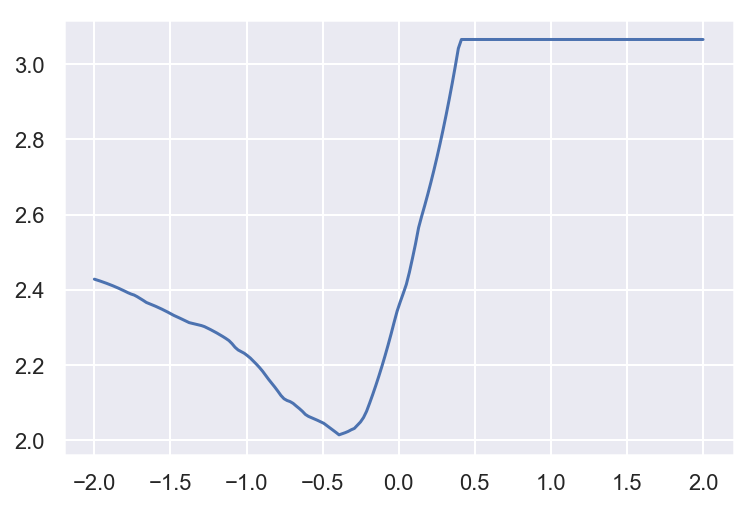

In [67]:
plt.plot(np.log10(alphalist), err_vec_val)

In [68]:
np.min(err_vec_val)

2.01400464860202

In [69]:
best_alpha = alphalist[np.argmin(err_vec_val)]
best_alpha

0.40554607358408296

In [70]:
lasso_model = Lasso(alpha = best_alpha)
lasso_model.fit(X_train, y_train)

Lasso(alpha=0.40554607358408296, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [71]:
list(zip(selected_columns, lasso_model.coef_))

[('Age', -0.27631905064683043),
 ('MP', 0.0012774973311611986),
 ('TS%', 0.0),
 ('TRB%', 0.07323180378509284),
 ('AST%', 0.020231495962116354),
 ('STL%', 0.0),
 ('BLK%', 0.1201864677723106),
 ('TOV%', 0.0006287592086113454),
 ('USG%', 0.040403566198776664),
 ('DRtg', -0.03205760881591009),
 ('DBPM', -0.0),
 ('BPM', 0.5817179062928354),
 ('Year', 0.0),
 ('Lottery', 0.0),
 ('Height', -0.0),
 ('Rookie_Age', -0.03883621965066274),
 ('TS%_g', -0.0),
 ('TRB%_g', -0.24959007953356704),
 ('AST%_g', 0.0),
 ('STL%_g', 0.0),
 ('BLK%_g', -0.0),
 ('TOV%_g', -0.0),
 ('USG%_g', 0.24859621709625734),
 ('MP%_g', -0.0),
 ('DRtg_g', -0.0)]

The information from Lasso can be used to prune unneccessary and possibly multicollinear features from the data. I choose to remove all features with coefficients that have been zeroed out by Lasso. 

In [72]:
X = kitchen_sink_df.loc[:,['Age', 'DRtg', 'BPM', 'MP','AST%_g','TOV%_g']]
y = kitchen_sink_df.loc[:,['Peak_WS']]

In [73]:
X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=10)

In [74]:
X, y = np.array(X), np.array(y)

In [75]:
kf = KFold(n_splits=5, shuffle=True, random_state = 71)
cv_lm_r2s, cv_lm_reg_r2s = [], []

In [76]:
for train_ind, val_ind in kf.split(X,y):
    
    X_train, y_train = X[train_ind], y[train_ind]
    X_val, y_val = X[val_ind], y[val_ind] 
    
    #simple linear regression
    lm = LinearRegression()
    lm_reg = Ridge(alpha=1)

    lm.fit(X_train, y_train)
    cv_lm_r2s.append(lm.score(X_val, y_val))
    
    #ridge with feature scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    
    lm_reg.fit(X_train_scaled, y_train)
    cv_lm_reg_r2s.append(lm_reg.score(X_val_scaled, y_val))

print('Simple regression scores: ', cv_lm_r2s)
print('Ridge scores: ', cv_lm_reg_r2s, '\n')

print(f'Simple mean cv r^2: {np.mean(cv_lm_r2s):.3f} +- {np.std(cv_lm_r2s):.3f}')
print(f'Ridge mean cv r^2: {np.mean(cv_lm_reg_r2s):.3f} +- {np.std(cv_lm_reg_r2s):.3f}')

Simple regression scores:  [0.5031843394880768, 0.09363650958812164, 0.5599976251152632, 0.5191342237513721, 0.3216632723839894]
Ridge scores:  [0.5039814458184533, 0.09768918139573557, 0.5608892684076129, 0.5211680693350204, 0.32265789589880145] 

Simple mean cv r^2: 0.400 +- 0.173
Ridge mean cv r^2: 0.401 +- 0.172


In [77]:
X = kitchen_sink_df.loc[:,['Age', 'DRtg', 'BPM', 'MP','AST%_g','TOV%_g']]
y = kitchen_sink_df.loc[:,['Peak_WS']]

In [78]:
X =sm.tools.tools.add_constant(X, prepend=True, has_constant='skip')
model = sm.OLS(y, X)

# Fit your model to your training set
fit = model.fit()

# Print summary statistics of the model's performance
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Peak_WS   R-squared:                       0.498
Model:                            OLS   Adj. R-squared:                  0.479
Method:                 Least Squares   F-statistic:                     25.68
Date:                Fri, 19 Jul 2019   Prob (F-statistic):           4.70e-21
Time:                        08:28:49   Log-Likelihood:                -381.74
No. Observations:                 162   AIC:                             777.5
Df Residuals:                     155   BIC:                             799.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.9817      6.814      1.905      0.059      -0.479      26.442
Age           -0.3264      0.136     -2.400      0.018      -0.595      -0.058
DRtg          -0.0221      0.059     -0.373      0.710      -0.139       0.095
BPM            0.5599      0.111      5.060      0.000       0.341       0.778
MP             0.0015      0.000      4.389      0.000       0.001       0.002
AST%_g         0.0372      0.059      0.627      0.531      -0.080       0.154
TOV%_g        -0.0411      0.080     -0.512      0.609      -0.199       0.117
==============================================================================
Omnibus:                        8.729   Durbin-Watson:                   1.829
Prob(Omnibus):                  0.013   Jarque-Bera (JB):                8.837
Skew:                           0.474   Prob(JB):                       0.0121
Kurtosis:                       3.640   Cond. No.                     5.79e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.79e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [79]:
X = kitchen_sink_df.loc[:,['Age', 'BPM','TOV%_g']]
y = kitchen_sink_df.loc[:,['Peak_WS']]

In [80]:
X =sm.tools.tools.add_constant(X, prepend=True, has_constant='skip')
model = sm.OLS(y, X)

# Fit your model to your training set
fit = model.fit()

# Print summary statistics of the model's performance
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Peak_WS   R-squared:                       0.429
Model:                            OLS   Adj. R-squared:                  0.418
Method:                 Least Squares   F-statistic:                     39.56
Date:                Fri, 19 Jul 2019   Prob (F-statistic):           3.99e-19
Time:                        08:28:49   Log-Likelihood:                -392.26
No. Observations:                 162   AIC:                             792.5
Df Residuals:                     158   BIC:                             804.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.2418      3.493      4.364      0.000       8.343      22.140
Age           -0.4152      0.142     -2.926      0.004      -0.695      -0.135
BPM            0.8138      0.085      9.623      0.000       0.647       0.981
TOV%_g        -0.0716      0.083     -0.862      0.390      -0.235       0.092
==============================================================================
Omnibus:                        3.435   Durbin-Watson:                   1.788
Prob(Omnibus):                  0.180   Jarque-Bera (JB):                3.202
Skew:                           0.344   Prob(JB):                        0.202
Kurtosis:                       3.039   Cond. No.                         398.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

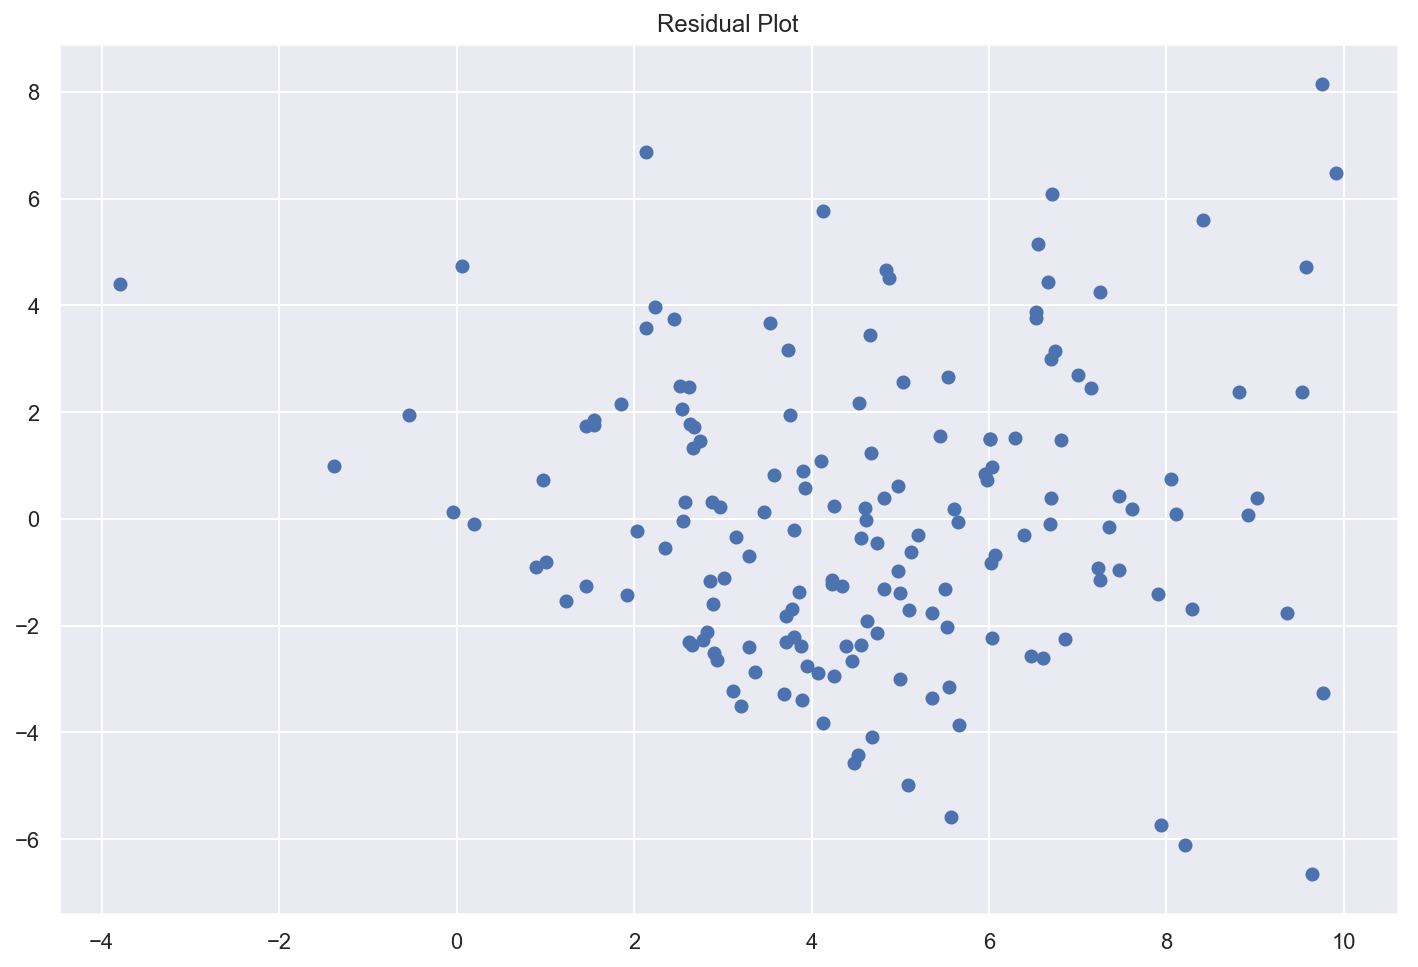

In [90]:
plt.figure(figsize=(12,8))
plt.scatter(fit.predict(), fit.resid);
plt.title("Residual Plot")
plt.savefig('resid_plot.png')

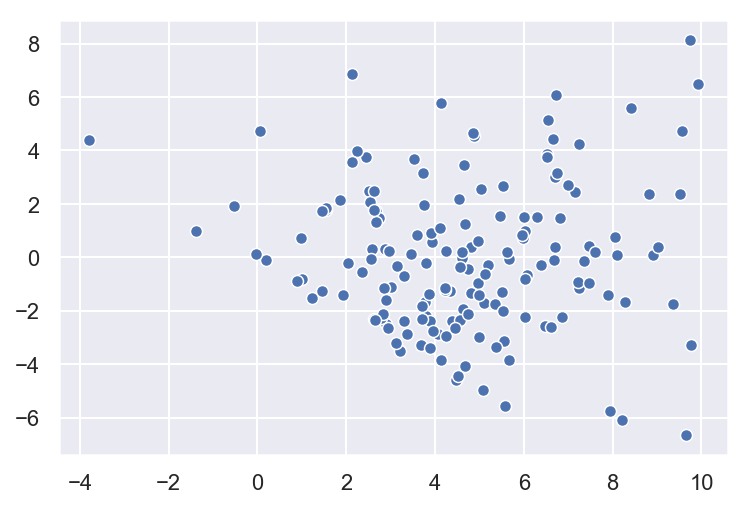

In [82]:
sns.scatterplot(fit.predict(), fit.resid)

In [89]:
def mae(y_true, y_pred):
    return np.mean(np.abs(y_pred - y_true))
X_test = sm.tools.tools.add_constant(X_test, prepend=True, has_constant='skip')
ypred = fit.predict(X_test.loc[:,['Age', 'BPM','TOV%_g']])
mae(y_test, ypred)


ValueError: shapes (33,3) and (4,) not aligned: 3 (dim 1) != 4 (dim 0)